# 2.2 numpy

# 1 overview
1. Numpy is a first-rate library for numerical programming
   - widely used in academia, finance and industry,
   - mature, fast, stable and under continuous development.
2. We have already seen some code involving NumPy in the preceding lectures, and in this lecture, we will start a more systematic discussion of both
   - NumPy **arrays** and
   - the **fundamental array processing operations** provided by NumPy.
3. [The official NumPy documentation](https://docs.scipy.org/doc/numpy/reference/).

# 2 numpy arrays

1. The essential problem that NumPy solves is (**PI:a**) fast array processing.
   - The most important structure that NumPy defines is an **array data type** formally called the N-dimensional array (numpy.ndarray) (**PI1: add full names**).
   - NumPy arrays power a large proportion of the scientific Python ecosystem.
   - e.g., to create a NumPy array containing only zeros(**PI:,**) we use np.zeros, see Program 1.
2. NumPy arrays are somewhat like native Python lists, except that
   - Data must be homogeneous (all elements of the same type), and
   - These types must be one of the data types (`dtypes`(**PI2: a link**)) provided by NumPy.
      - The most important of (**PI: delete `of`**) dtypes are:
        - float64: 64(**PI:-**)bit floating-point number
        - int64: 64(**PI:-**)bit integer
        - bool: 8 bit True or False
      - There are also dtypes to represent complex numbers, unsigned integers, etc.
      - On modern machines, the default dtypes for array is `float64`, see program 2.
        - If we want to use other dtypes, then we can specify it, see program 3.

In [2]:
import numpy as np

# Program 1

a = np.zeros(3)
type(a)

numpy.ndarray

In [3]:
# Program 2
type(a[0])

numpy.float64

In [4]:
# Program 3
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int64

## 2.1 shape and dimension

1. Consider the assignment in Program 1:
    - `z` is a **flat** array with no dimension.
      - neither row nor column vector.
    - The dimension is recorded in the `shape` attribute, which is a tuple.
      - Here(**PI:,**) the shape tuple has only one element, which is the length of the array (tuples with one element end(**PI: and**) with a comma).
2. To give it (**PI:a**) dimension, we can change the `shape` attribute, see Program 2.
   - Program 3 and 4 are equivalent:
     - To make the 2 by 2 array in Program 3, we could also pass a tuple to the `zeros()` function, as in Program 4.

In [7]:
# Program 1

z = np.zeros(10)

z.shape

(10,)

In [9]:
# Program 2
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
# Program 3
z = np.zeros(4)
z.shape = (2, 2)
z

array([[0., 0.],
       [0., 0.]])

In [12]:
# Program 4
z = np.zeros((2,2))
z

array([[0., 0.],
       [0., 0.]])

## 2.2 creating arrays
1. Since the `np.zeros` function creates an array of zeros, we know
   - The `np.ones` function creates an array of ones.
   - The `np.empty` function creates arrays in memory that can later be populated with data.
     - e.g., the numbers we see in Program 1 are garbage values.
       - Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values.
2. To set up a grid of evenly spaced numbers(**PI:,**) use `np.linspace`, see Program 2.
3. To create an identity matrix(**PI:,**) use either `np.identity` or `np.eye`, see Program 3.
4. NumPy arrays can be created from Python lists, tuples, etc. using `np.array`, see Program 4.
   - `np.asarray`, which performs a similar function, but does not make a distinct copy of data already in a NumPy array, see Program 5.
5. To read in the array data from a text file containing numeric data(**PI: ,**) use `np.loadtxt` or `np.genfromtxt`, see the [doc](https://docs.scipy.org/doc/numpy/reference/routines.io.html) (**PI3: how to???**).

In [13]:
# Program 1

z = np.empty(3)
z

array([0., 0., 0.])

In [15]:
# Program 2: From 2 to 4, with 5 elements

z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [19]:
# Program 3-1

z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

In [20]:
# Program 3-2

z = np.eye(2)
z

array([[1., 0.],
       [0., 1.]])

In [21]:
# Program 4-1: ndarray from Python list

z = np.array([10, 20])
z

array([10, 20])

In [22]:
type(z)

numpy.ndarray

In [23]:
# Program 4-2: define the type of ndarray; here `float` is equivalent to `np.float64`

z = np.array((10, 20), dtype=float)
z

array([10., 20.])

In [25]:
# Program 4-3: 2D array from a list of lists

z = np.array([[10, 20],[3, 4]])
z

array([[10, 20],
       [ 3,  4]])

In [26]:
# Program 5

na = np.linspace(10, 20, 2)
na is np.asarray(na)  # Does not copy NumPy arrays

True

In [27]:
na is np.array(na)   # Does make a new copy -- perhaps unnecessarily

False

## 2.3 array indexing

1. For a **flat array**, indexing is the same as Python sequences, see Program 1.
2. For **2D** arrays(**PI: ,**) the index syntax is in Program 2.
   - Note that indices are still zero-based, to maintain compatibility with Python sequences.
   - Columns and rows can be extracted as in Program 3.
3. NumPy arrays of integers can also be used to extract elements, see Program 4.
4. An array of `dtype bool` can be used to extract elements, see Program 5.
   - We will see why this is useful.
5. All elements of an array can be set equal to one number using slice notation `:`, see Program 6.

In [28]:
# Program 1
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [29]:
z[0]

1.0

In [30]:
z[0:2]

array([1.  , 1.25])

In [31]:
z[-1]

2.0

In [32]:
# Program 2
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [33]:
z[0, 0]

1

In [34]:
z[0, 1]

2

In [35]:
# Program 3-1
z[0, :]

array([1, 2])

In [37]:
# Program 3-2
z[:, 1]

array([2, 4])

In [38]:
# Program 4-1

z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [41]:
# Program 4-2

indices = np.array((0, 2, 3))
z[ indices ]

array([2. , 3. , 3.5])

In [42]:
# Program 5-1

d = np.array([0, 1, 1, 0, 0], dtype=bool)
d

array([False,  True,  True, False, False])

In [43]:
# Program 5-2

z[d]

array([2.5, 3. ])

In [45]:
# Program 6-1
z = np.empty(3)
z

array([2. , 3. , 3.5])

In [46]:
# Program 6-2
z[:]=42
z

array([42., 42., 42.])

## 2.4 array methods

1. Arrays have useful methods, all of which are carefully optimized (**???**).
   - `sort`: sort the array in place, see Program 1.
   - `sum`: sum, see Program 2.
   - `mean`: mean, see program 3.
   - `max`: max, see program 4.
   - `argmax`: returns the index of the maximal element, see program 5.
   - `cumsum`: cumulative **sum** of the elements of the array, see program 6.
   - `cumprod`: cumulative **product** of the elements of the array, see Program 7.
   - `var`: variance, see program 8.
   - `std`: standard deviation, see program 9.
   - `T`/`transpose`: do transpose of a matrix, see program 10.
2. Another method worth knowing is `searchsorted()`.
   - If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of `z` that is `>= a`, see program 11.
3. Many of the methods discussed above have equivalent functions in the NumPy namespace (**???**).
   - e.g., see Program 12.

In [47]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [48]:
# Program 1
a.sort()
a

array([1, 2, 3, 4])

In [51]:
# Program 2
a.sum()

10

In [52]:
# Program 3
a.mean()

2.5

In [53]:
# Program 4
a.max()

4

In [55]:
# Program 5
a.argmax()

3

In [56]:
# Program 6
a.cumsum()

array([ 1,  3,  6, 10])

In [57]:
# Program 7
a.cumprod()

array([ 1,  2,  6, 24])

In [58]:
# Program 8
a.var()

1.25

In [59]:
# Program 9
a.std()

1.118033988749895

In [60]:
# Program 10
a.shape=(2, 2)
a.T

array([[1, 3],
       [2, 4]])

In [63]:
# Program 11
z = np.linspace(2, 4, 5)
print(z, z.searchsorted(2.2))

[2.  2.5 3.  3.5 4. ] 1


In [64]:
# Program 12
a = np.array((4, 3, 2, 1))
print(np.sum(a), np.mean(a))

10 2.5


# 3 operations on arrays

## 3.1 arithmetic operations

1. The operators `+`, `-`, `*`, `/` and `**` all act elementwise on arrays, see Programs 1-2.
2. We can add a scalar to each element, see Program 3.
   - Scalar multiplication is similar, see Program 4.
3. The two dimensional arrays follow the same general rules, see Program 5-7.
   - In particular, `A * B` is not the matrix product, it is an element-wise product, see Program 7.

In [65]:
# Program 1

a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [66]:
# Program 2

a * b # ???

array([ 5, 12, 21, 32])

In [67]:
# Program 3

a + 10

array([11, 12, 13, 14])

In [68]:
# Program 4

a * 10

array([10, 20, 30, 40])

In [69]:
# Program 5

A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [70]:
# Program 6

A + 10

array([[11., 11.],
       [11., 11.]])

In [71]:
# Program 7

A * B

array([[1., 1.],
       [1., 1.]])

## 3.2 matrix multiplication

1. In Python 3.5 or above, use the `@` symbol for **matrix multiplication**, see Program 1.
   - For older versions of Python and NumPy(**PI:,**) we need to use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function.
   - We can also use `@` to take the **inner product of two flat arrays**, see Program 2.
   - In fact, we can use `@` when one element is a Python list or tuple, see Program 3 (**what kind of operation it is? Matrix multiplication**).
     - Since we are post-multiplying, the tuple is treated as a column vector

In [3]:
# Program 1

A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

In [7]:
# Program 2

A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

In [9]:
# Program 3

A = np.array(((1, 2), (3, 4)))
print(A, A @ (0, 1))

[[1 2]
 [3 4]] [2 4]


## 3.3 mutability and copying arrays

1. NumPy arrays are **mutable** data types, like Python lists.
   - In other words, their contents can be altered (mutated) in memory after initialization, see Program 1.
   
2. Mutability leads to the following behavior (which can be shocking to MATLAB programmers (**why???**)), see Program 2.
   - We have changed `a` by changing `b`.
   - The name `b` is bound to `a` and becomes just another **reference** to the array (the Python assignment model is described in more detail later (lecture 3.1)).
   - Hence, `b` has equal rights to make changes to that array.
     - This is the most sensible default behavior.
     - It means that we pass around only pointers to data, rather than making copies.
       - Making copies is expensive in terms of both speed and memory.

In [10]:
# Program 1-1

a = np.array([42, 44])
a

array([42, 44])

In [11]:
# Program 1-2

a[-1] = 0  # Change (**PI: the**) last element to 0
a

array([42,  0])

In [13]:
# Program 2-1: ???

a = np.random.rand(3)
a

array([0.10038792, 0.4264703 , 0.82172277])

In [14]:
# Program 2-2

b = a
b[0] = 0.0
a

array([0.        , 0.4264703 , 0.82172277])

### 3.3.1 Making copies

1. To make `b` an independent copy of `a`, called a **deep copy**, use `np.copy`. see Program 1-3.
   - Note that the change to `b` has not affected `a`, see Program 3.

In [15]:
# Program 1

a = np.random.randn(3)
a

array([ 0.28471901, -0.29081157, -0.10460308])

In [18]:
# Program 2

b = np.copy(a)
b

array([ 0.28471901, -0.29081157, -0.10460308])

In [22]:
# Program 3

b[:] = 1
print(b, a)

[1. 1. 1.] [ 0.28471901 -0.29081157 -0.10460308]


# 4 additional functionality

There are other useful things we can do with NumPy.

## 4.1 vectorized functions

1. NumPy provides versions of the standard functions `log`, `exp`, `sin`, etc. that act element-wise on arrays, see Program 1.
   - This eleminates the need for explicit element-by-element loops, such as Program 2.
   - Because they act element-wise on arrays, these functions are called **vectorized functions**.
     - In NumPy-speak, they are also called **ufuncs**, which stands for "universal functions".
2. As we saw above, the usual **arithmetic operations (`+`, `*`. etc.)** also work **element-wise**, see Program 3.
   - Combining these with the **ufuncs** gives a very large set of fast element-wise functions.
3. Not all user-defined functions will act element-wise.
   - e.g., passing the function `f` defined in Program 4 a NumPy array causes a `ValueError`.
   - The NumPy function `np.where` provides a vectorized alternative, see Program 5.
   - We can also use `np.vectorize` to vectorize a given function, see Program 6.
     - This approach doesn't always obtain the **same speed** (**???**) as a more carefully crafted vectorized function. 

In [23]:
# Program 1

z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

In [26]:
# Program 2

n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])
y # PI: add `y`

array([0.84147098, 0.90929743, 0.14112001])

In [27]:
# Program 3-1

z

array([1, 2, 3])

In [28]:
# Program 3-2

(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([0.24197072, 0.05399097, 0.00443185])

In [29]:
# Program 4

def f(x):
    return 1 if x > 0 else 0

In [30]:
# Program 5-1

x = np.random.randn(4)
x

array([ 2.01092881,  0.47092097, -0.34773235, -0.78398178])

In [31]:
# Program 5-2: PI: return 1 if x > 0 true, otherwise 0

np.where(x > 0, 1, 0)

array([1, 1, 0, 0])

In [32]:
# Program 6

def f(x): return 1 if x > 0 else 0 # PI: superfluous?

f = np.vectorize(f)
f(x)  # Passing the same vector x as in the previous example

array([1, 1, 0, 0])

## 4.2 comparisons

1. As a rule, **comparisons on arrays** are done element-wise.
   - e.g., for `==` and `!=`, see Program 1-3.
   - The situation is similar for `>`, `<`, `>=` and `<=`.
2. We can also do **comparisons against scalars**, see Program 4.
   - This is particular useful for **conditional extraction**, see Program 5.
   - We can and frequently do perform Program 5 in one step.

In [33]:
# Program 1

z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True])

In [34]:
# Program 2

y[0] = 5
z == y

array([False,  True])

In [35]:
# Program 3
z != y

array([ True, False])

In [36]:
# Program 4-1

z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [37]:
# Program 4-2

z > 3

array([False, False,  True,  True,  True])

In [38]:
# Program 5-1

b = z > 3
b

array([False, False,  True,  True,  True])

In [39]:
# Program 5-2

z[b]

array([ 5. ,  7.5, 10. ])

In [40]:
# Program 6

z[z > 3]

array([ 5. ,  7.5, 10. ])

## 4.3 sub-packages
1. NumPy provides some additional functionality related to scientific programming through its sub-packages.
   - We've already seen how we can generate random variables using `np.random` (**PI4: add ` ` **), see Program 1.
   - Another commonly used subpackage is `np.linalg` (**PI$4^*$: add ` ` for what? some links**), see Program 2.
     - Much of this functionality is also available in [SciPy](https://www.scipy.org/), a collection of modules that are built on top of NumPy.
     - We will cover the SciPy versions in 2.4.
2. For a comprehensive list of what's available in NumPy(**PI:,**) see [doc](https://docs.scipy.org/doc/numpy/reference/routines.html)

In [41]:
# Program 1

z = np.random.randn(10000) # PI5: superfluous? 
y = np.random.binomial(10, 0.5, size=1000) # 1,000 draws from Bin(10, 0.5)
y.mean()

4.936

In [43]:
# Program 2-1

A = np.array([[1, 2], [3, 4]])

np.linalg.det(A) # Compute the determinant of A

-2.0000000000000004

In [ ]:
# Program 2-2

np.linalg.inv(A) # Compute the inverse of A

# 5 Exercises

## Exercise 1

In [73]:
def p(x, coeff):
    n = len(coeff)
    X = np.ones(n) * x # These two lines can be replaced with `X = np.ones_like(coeff) * x
    X[0] = 1
    X = np.cumprod(X)
    return X @ coeff

In [77]:

coeff = np.linspace(0, 6, 6)
print(p(2, coeff))

# Comparison

q = np.poly1d(np.flip(coeff)) # A function in numpy also does this implementation.
print(q(2))

309.59999999999997
309.6


## Exercise 2

In [80]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]
        

In [59]:
q = np.ones(10) * 0.1 
sample(q)

1

In [81]:
def sample_v(q):
    U = uniform(0, 1)
    a = np.cumsum(q)
    return np.searchsorted(a, U, side='left')


In [82]:
sample_v(q)

0

In [83]:
class discreteRV:
    
    def __init__(self, q):
        self.q = q
        
    def draw(self):
        U = uniform(0, 1)
        a = np.cumsum(self.q)
        return np.searchsorted(a, U, side='left')

In [84]:
drv = discreteRV(q)
drv.draw()

0

In [85]:
class discreteRV_n:
    
    def __init__(self, q):
        self.q = q
        
    def draw(self, k):
        K = np.empty(k)
        for i in range(len(K)):
            U = uniform(0, 1)
            a = np.cumsum(self.q)
            K[i] = np.searchsorted(a, U, side='left')
        return K

In [70]:
drv_n = discreteRV_n(q)
drv_n.draw(6)

array([7., 7., 5., 6., 3., 2.])

In [86]:
# Solution 

class DiscreteRV: # class name mismatches.
    
    def __init__(self, q):
        self.q = q
        self.Q = np.cumsum(q)
        
    def draw(self, k=1):
        return self.Q.searchsorted(uniform(0, 1, size=k))

In [88]:
q = (0.1, 0.9)
d = DiscreteRV(q)
d.q = (0.5, 0.5)

In [89]:
d.Q # ??? what is the idea behind the improvement? PI6:

array([0.1, 1. ])

## Exercise 3

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
class ECDF:
    
    def __init__(self, sample):
        self.o = sample
        
    def __call__(self, x):
        f = np.searchsorted(self.o, x, side='right')
        self.f = f / len(self.o)
        return self.f
    
    def plot(self, a, b):
        x = np.linspace(a, b, num=100)
        fig, ax = plt.subplots(figsize=(9, 6))
        f = np.vectorize(self.__call__) # !!! np.vectorize() creates a vectorized function
        plt.plot(x, f(x), alpha=0.6, label='$ECDF$')
        ax.set_xlabel('$x$', fontsize=14)
        ax.set_ylabel('$ECDF$', fontsize=14)
        ax.legend()
        plt.show() 

In [152]:
from random import uniform

# samples = [uniform(0, 1) for i in range(1000)]
samples = np.random.randn(1000)
F = ECDF(samples)  # Evaluate ecdf at x = 0.5

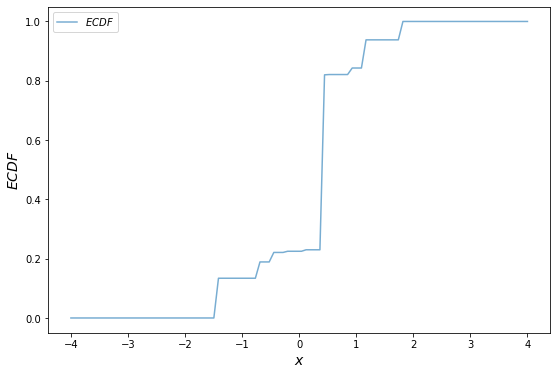

In [153]:
F.plot(-4, 4) # Why different from the solution? ax vs. plt PI7

In [154]:
def plot(a, b, n):
        x = np.linspace(a, b, n)
        fig, ax = plt.subplots()
        ax.plot(x, F(x), alpha=0.6, label='$ECDF$')
        ax.set_xlabel('$x$', fontsize=14)
        ax.set_ylabel('$ECDF$', fontsize=14)
        ax.legend()
        plt.show()

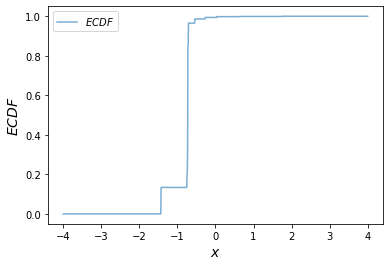

In [155]:
plot(-4, 4, 1000)

In [160]:
# Solution

class ECDF_n:
    
    def __init__(self, observations):
        self.observations = np.asarray(observations)
        
    def __call__(self, x):
        return np.mean(self.observations <= x)
    
    def plot(self, a=None, b=None):
        
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()
            
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)  # PI8: add some explanations to np.vectorize()
        plt.plot(x_vals, f(x_vals)) # PI9: add labels here?
        plt.show()

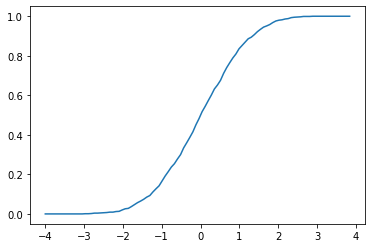

In [161]:
X = np.random.randn(1000)
F2 = ECDF_n(X)
F2.plot()